# Weather/Borough Analysis of Rat Sightings

In [1]:
# Importing dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

from datetime import datetime,date

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Opening datasets needed for analysis

rat_data = pd.read_csv('clean_csv/final_rat_sightings.csv')
rest_data = pd.read_csv('clean_csv/final_rat_violations.csv')
weather_data = pd.read_csv('clean_csv/final_weather.csv')

In [3]:
weather_data.head()

,Unnamed: 0,Date,Max Temp (F),Mean Temp (F),Min Temp (F),Max Humidity,Mean Humidity,Min Humidity,Max Pressure (In),Mean Pressure (In),Min Pressure (In),Precipitation (In),City,Season
0,0,2010-01-02,33,25.0,17,89,68,46,29.70,29.67,29.62,0.01,New York City (USA),Winter
1,1,2010-01-03,24,21.0,18,62,53,44,29.64,29.55,29.47,0.00,New York City (USA),Winter
2,2,2010-01-04,32,26.0,20,62,53,43,29.76,29.71,29.66,0.00,New York City (USA),Winter
3,3,2010-01-05,32,27.0,21,62,53,43,29.76,29.73,29.68,0.00,New York City (USA),Winter
4,4,2010-01-06,36,31.0,26,63,52,40,29.80,29.73,29.68,0.00,New York City (USA),Winter


In [5]:
#merge weather and rat data
rat_data = rat_data.rename(columns = {'Sighting Date':'Date'})
weather_rat = pd.merge(rat_data, weather_data, how="inner", on="Date")


In [6]:
#create year column
weather_rat["Year"] = pd.DatetimeIndex(weather_rat["Date"]).year
weather_rat.head()

,Unnamed: 0_x,Incident ID,Date,Complaint Type,Incident,Location Type,Incident Zip,Borough,X Coordinate (State Plane),Y Coordinate (State Plane),...,Max Humidity,Mean Humidity,Min Humidity,Max Pressure (In),Mean Pressure (In),Min Pressure (In),Precipitation (In),City,Season,Year
0,0,31464015,2015-09-04,Rodent,Rat Sighting,3+ Family Mixed Use Building,10006,Manhattan,980656.0,197137.0,...,82,70,58,30.22,30.07,29.91,0.0,New York City (USA),Summer,2015
1,1,31464024,2015-09-04,Rodent,Rat Sighting,Commercial Building,10306,Staten Island,955207.0,148858.0,...,82,70,58,30.22,30.07,29.91,0.0,New York City (USA),Summer,2015
2,2,31464025,2015-09-04,Rodent,Rat Sighting,1-2 Family Dwelling,10310,Staten Island,949033.0,169278.0,...,82,70,58,30.22,30.07,29.91,0.0,New York City (USA),Summer,2015
3,3,31464026,2015-09-04,Rodent,Rat Sighting,3+ Family Apt. Building,11206,Brooklyn,1000550.0,197585.0,...,82,70,58,30.22,30.07,29.91,0.0,New York City (USA),Summer,2015
4,4,31464027,2015-09-04,Rodent,Rat Sighting,3+ Family Mixed Use Building,10462,Bronx,1021648.0,250489.0,...,82,70,58,30.22,30.07,29.91,0.0,New York City (USA),Summer,2015


# Seasons

Hypothesis - There will be more rat sightings in the Summer because more people and rats are out to enjoy the nice weather!

Conclusion - There are more rat sightings in the summer.  Weather is statistically significant with a p value of 1.23e-05

In [24]:
# Is weather statistically significant for rat sightings?
# create new dataframe grouping count of incidents by year and season
year_count = pd.DataFrame({"Count Sightings":weather_rat.groupby(["Year", "Season"])["Incident ID"].count()}).reset_index()
year_count
autumn = year_count.loc[year_count['Season'] == "Autumn"]
spring = year_count.loc[year_count['Season'] == "Spring"]
summer = year_count.loc[year_count['Season'] == "Summer"]
winter = year_count.loc[year_count['Season'] == "Winter"]


,Year,Season,Count Sightings
3,2010,Winter,1512
7,2011,Winter,1674
11,2012,Winter,1870
15,2013,Winter,2052
19,2014,Winter,1828
23,2015,Winter,2227


In [8]:
#season (all years combined)
weather_count = pd.DataFrame({"Count Sightings":weather_rat.groupby(["Season"])["Incident ID"].count()}).reset_index()
weather_count

,Season,Count Sightings
0,Autumn,15129
1,Spring,20104
2,Summer,23390
3,Winter,11163


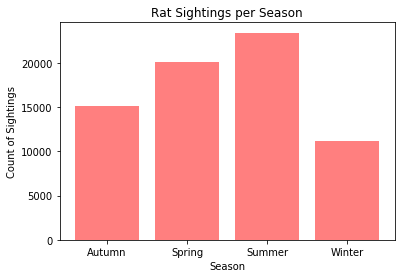

In [32]:
plt.bar(weather_count["Season"], weather_count["Count Sightings"] , color="red", alpha=0.5, align="center")

plt.title("Rat Sightings per Season")
plt.xlabel("Season")
plt.ylabel("Count of Sightings")

plt.savefig("rat_sightings_seasons.png")

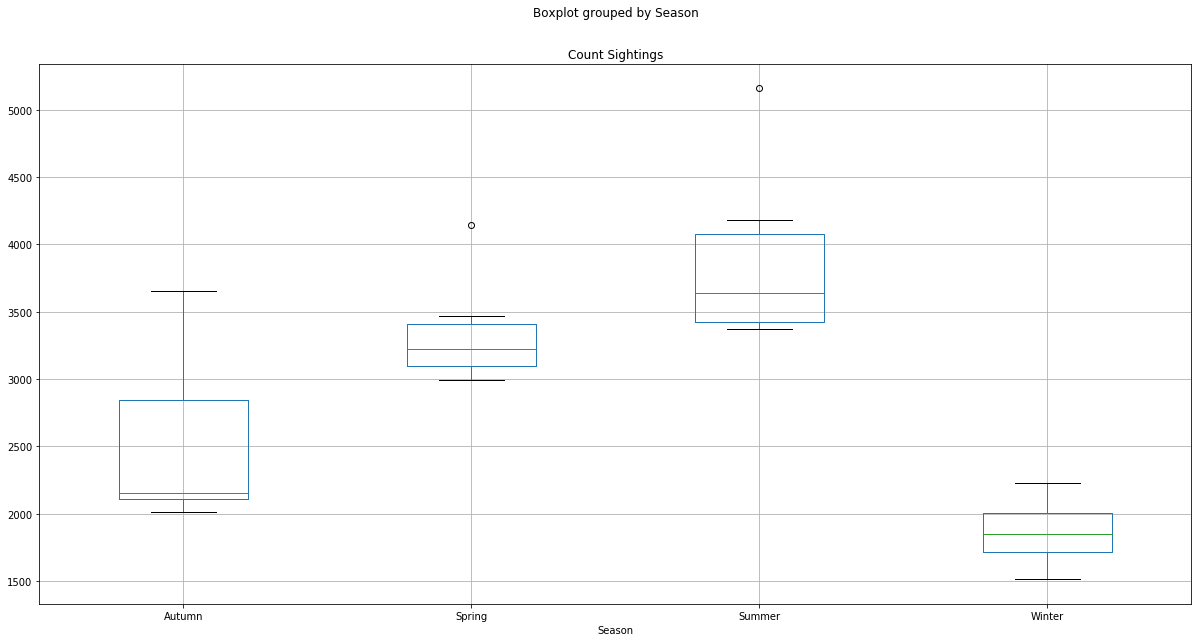

In [10]:
#Is this statistically significant?

year_count.boxplot("Count Sightings", by="Season", figsize=(20, 10))


In [27]:
F, p = stats.f_oneway(autumn["Count Sightings"], spring["Count Sightings"], summer["Count Sightings"], winter["Count Sightings"])
F, p

(16.508906404518473, 1.2334395659251597e-05)

# Borough

Null Hypothesis - There is no correlation between rat sightings and Borough

Conclusion - There is a correlation between rat sightings and borough - you are more likely to come across a rat in Brooklyn than the other four boroughs. This has a p value of 1.87e-08

In [135]:
borough_count = pd.DataFrame({"Count Sightings":weather_rat.groupby(["Borough", "Incident Zip"])["Incident ID"].count()}).reset_index()
borough_count.head()


,Borough,Incident Zip,Count Sightings
0,Bronx,10451,566
1,Bronx,10452,820
2,Bronx,10453,818
3,Bronx,10454,313
4,Bronx,10455,559


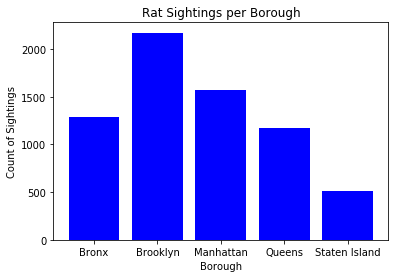

In [136]:
plt.bar(borough_count["Borough"], borough_count["Count Sightings"], color='blue', )
plt.title("Rat Sightings per Borough")
plt.xlabel("Borough")
plt.ylabel("Count of Sightings")

plt.savefig("rat_sightings_borough.png")

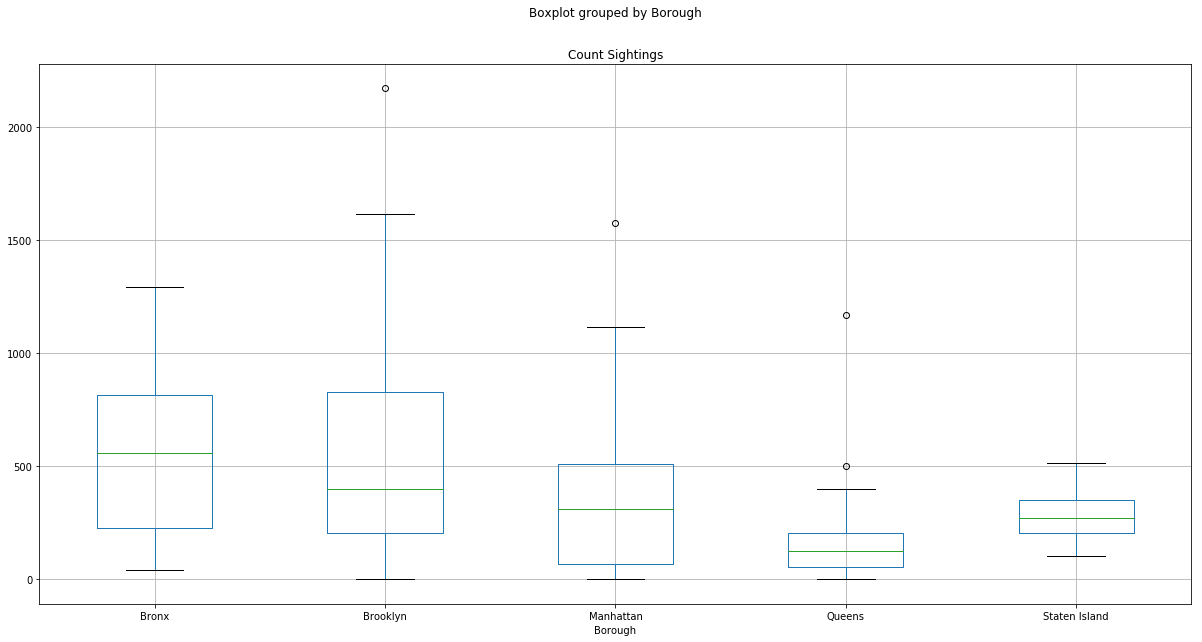

In [137]:

borough_count.boxplot("Count Sightings", by="Borough", figsize=(20, 10))

In [138]:
bronx = borough_count.loc[borough_count['Borough'] == "Bronx"]
brooklyn = borough_count.loc[borough_count['Borough'] == "Brooklyn"]
manhattan = borough_count.loc[borough_count['Borough'] == "Manhattan"]
queens = borough_count.loc[borough_count['Borough'] == "Queens"]
staten_island = borough_count.loc[borough_count['Borough'] == "Staten Island"]

In [139]:
F, p = stats.f_oneway(bronx["Count Sightings"], brooklyn["Count Sightings"], manhattan["Count Sightings"], queens["Count Sightings"], staten_island["Count Sightings"])
print(F, p)

11.657402279024618 1.8708741672342857e-08


# Precipitation

Null Hypothesis - There is no correlation between precipitation and rat sightings.

Conclusions - 

In [71]:
#is there a correlation between precipitation and sightings?
precipitation_count = pd.DataFrame({"Count Sightings":weather_rat.groupby(["Precipitation (In)"])["Incident ID"].count()}).reset_index()
precipitation_count.head()

,Precipitation (In),Count Sightings
0,0.00,48231
1,0.01,2226
2,0.02,1449
3,0.03,1403
4,0.04,912


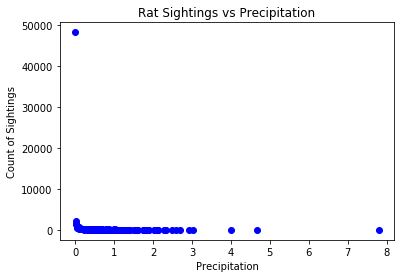

In [73]:
plt.scatter(precipitation_count["Precipitation (In)"], precipitation_count["Count Sightings"], color='blue', )
plt.title("Rat Sightings vs Precipitation")
plt.xlabel("Precipitation")
plt.ylabel("Count of Sightings")

plt.savefig("rat_sightings_precipitation.png")


# Humidity

Null Hypothesis - There is no correlation between humidity and rat sightings



In [132]:
#is there a correlation between Humidity and Sightings
humidity_count = pd.DataFrame({"Count Sightings":weather_rat.groupby(["Mean Humidity"])["Incident ID"].count()}).reset_index()
humidity_count.head()

,Mean Humidity,Count Sightings
0,22,7
1,25,10
2,27,125
3,28,30
4,29,75


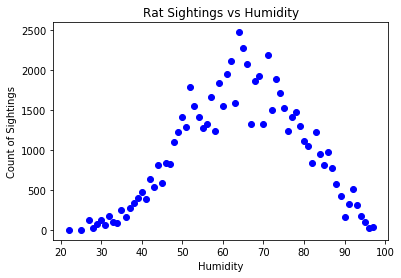

In [133]:
plt.scatter(humidity_count["Mean Humidity"], humidity_count["Count Sightings"], color='blue', )
plt.title("Rat Sightings vs Humidity")
plt.xlabel("Humidity")
plt.ylabel("Count of Sightings")

plt.savefig("rat_sightings_humidity.png")

# Location Type

Hypothesis - Rat sightings are more likely to occur in public spaces rather than residential

Conclusion - 

In [76]:
weather_rat["Location Type"].value_counts()

3+ Family Apt. Building          27691
1-2 Family Dwelling              13832
Other (Explain Below)            10154
3+ Family Mixed Use Building      5905
Commercial Building               3192
Vacant Lot                        2651
Construction Site                 1371
Vacant Building                   1356
1-2 Family Mixed Use Building     1231
Catch Basin/Sewer                  718
Parking Lot/Garage                 561
Public Garden                      357
Government Building                189
School/Pre-School                  133
Single Room Occupancy (SRO)        124
Public Stairs                       94
Day Care/Nursery                    86
Office Building                     68
Hospital                            67
Summer Camp                          6
Name: Location Type, dtype: int64

In [115]:
#rename location types
weather_rat_new = weather_rat.replace({"+ Family Apt. Building": "Residential", 
                                       "1-2 Family Dwelling": "Residential",
                                       "3+ Family Mixed Use Building": "Residential",
                                       "3+ Family Apt. Building": "Residential",
                                       "1-2 Family Mixed Use Building": "Residential",
                                       "Single Room Occupancy (SRO)": "Residential",
                                       "Day Care/Nursery": "Public Space",
                                       "School/Pre-School": "Public Space",
                                       "Parking Lot/Garage": "Public Space",
                                       "Public Garden": "Public Space",
                                       "Public Stairs": "Public Space",
                                       "Hospital": "Public Space",
                                       "Office Building": "Public Space",
                                       "Commercial Building": "Public Space",
                                       "Government Building": "Public Space",
                                       "Summer Camp": "Public Space",
                                       "Vacant Lot": "Vacant Lot/Building",
                                       "Vacant Building": "Vacant Lot/Building"})


In [116]:
weather_rat_new["Location Type"].value_counts()

Residential              48783
Other (Explain Below)    10154
Public Space              4753
Vacant Lot/Building       4007
Construction Site         1371
Catch Basin/Sewer          718
Name: Location Type, dtype: int64

In [117]:
weather_rat_new.head()

weather_rat_new_count = pd.DataFrame({"Count Sightings":weather_rat_new.groupby(["Location Type", "Year"])["Incident ID"].count()}).reset_index()
weather_rat_new_count.head()


,Location Type,Year,Count Sightings
0,Catch Basin/Sewer,2010,171
1,Catch Basin/Sewer,2011,97
2,Catch Basin/Sewer,2012,91
3,Catch Basin/Sewer,2013,115
4,Catch Basin/Sewer,2014,111


In [119]:
residential = weather_rat_new_count.loc[weather_rat_new_count["Location Type"] == "Residential"]
other = weather_rat_new_count.loc[weather_rat_new_count["Location Type"] == "Other (Explain Below)"]
vacant = weather_rat_new_count.loc[weather_rat_new_count["Location Type"] == "Vacant Lot/Building"]
construction = weather_rat_new_count.loc[weather_rat_new_count["Location Type"] == "Construction Site"]
sewer = weather_rat_new_count.loc[weather_rat_new_count["Location Type"] == "Catch Basin/Sewer"]
public = weather_rat_new_count.loc[weather_rat_new_count["Location Type"] == "Public Space"]
public

,Location Type,Year,Count Sightings
18,Public Space,2010,637
19,Public Space,2011,647
20,Public Space,2012,750
21,Public Space,2013,728
22,Public Space,2014,887
23,Public Space,2015,1104


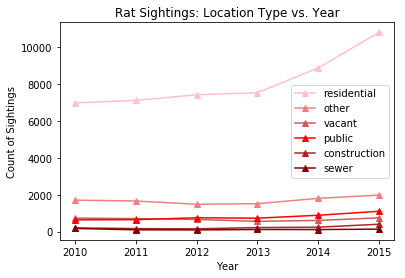

In [131]:
plt.plot(residential["Year"], residential["Count Sightings"], marker='^', color='pink', label="residential")
plt.plot(other["Year"], other["Count Sightings"], marker='^', color='lightcoral', label="other")
plt.plot(vacant["Year"], vacant["Count Sightings"], marker='^', color='indianred', label="vacant")
plt.plot(public["Year"], public["Count Sightings"], marker='^', color='red', label="public")
plt.plot(construction["Year"], construction["Count Sightings"], marker='^', color='firebrick', label="construction")
plt.plot(sewer["Year"], sewer["Count Sightings"], marker='^', color='maroon', label="sewer")
plt.legend(loc="right")
plt.title("Rat Sightings: Location Type vs. Year")
plt.xlabel("Year")
plt.ylabel("Count of Sightings")
plt.savefig("rat_sightings_location.png")